In [57]:
library(rethinking)
library(dagitty)
library(ggplot2)
# library(lattice)
# library(MASS)
# library(mosaic)
# library(latticeExtra)
options(repr.matrix.max.cols=150, repr.matrix.max.rows=200)

# Chapter 4
+ ## 4.1 Why normal distributions are normal
+ ## 4.2 A language for describing models
+ ## 4.3 Gaussian model of height
+ ## 4.4 Linear prediction
+ ## 4.5 Curves from lines

## 4 Introduction
+ Planet motion as epicyclic gear - wrong model, but accurately predictor
+ Linear regression same deal - can be good predictor, regardless of the real underlying mechanism of data generation.

## 4.1 Why normal distributions are normal
+ Tends to occur as a result of many additive errors

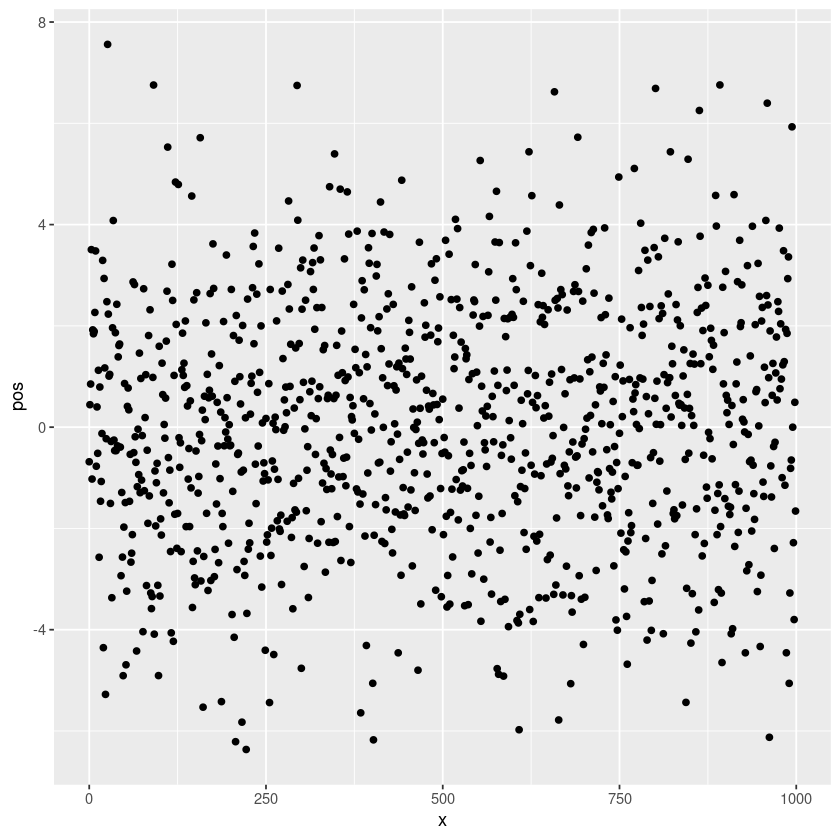

In [2]:
# Cannot reproduce the book plot.
# Think need to create 1000 columns with 16 points in each where each represents a path?
# Generate 16 random numbers from uniform distribution between -1, and +1 and sum them ? 
dfn <- data.frame(x=0:999, pos=replicate(1000, sum(runif(16, -1,1))))

ggplot(data=dfn, aes(x=x, y=pos)) +
      geom_point()

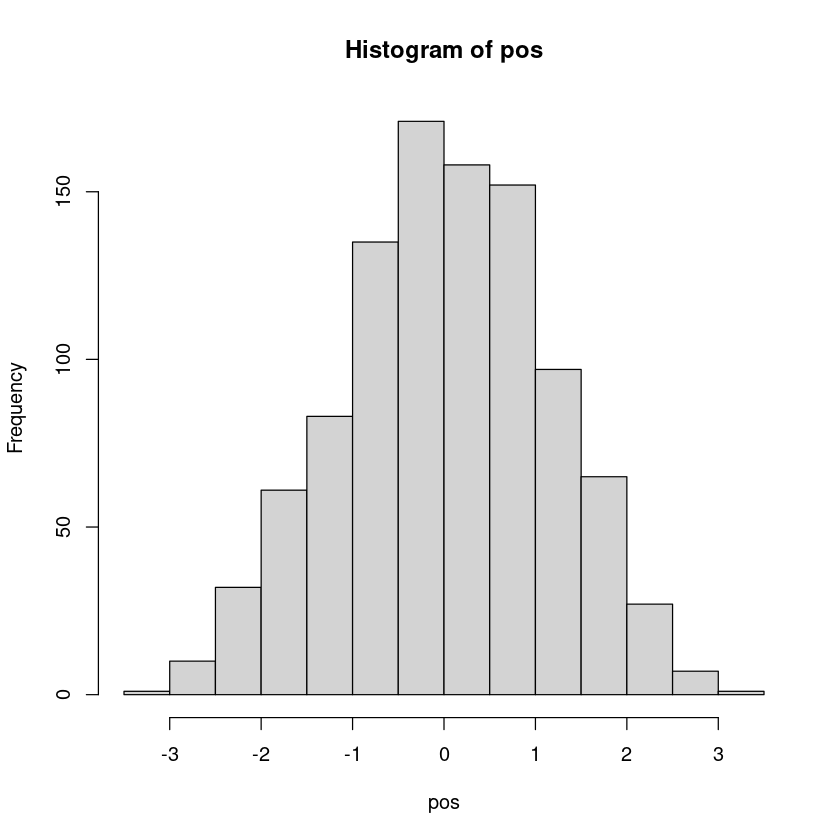

In [3]:
pos <- replicate(1000, sum(runif(4, -1, 1)))
hist(pos)

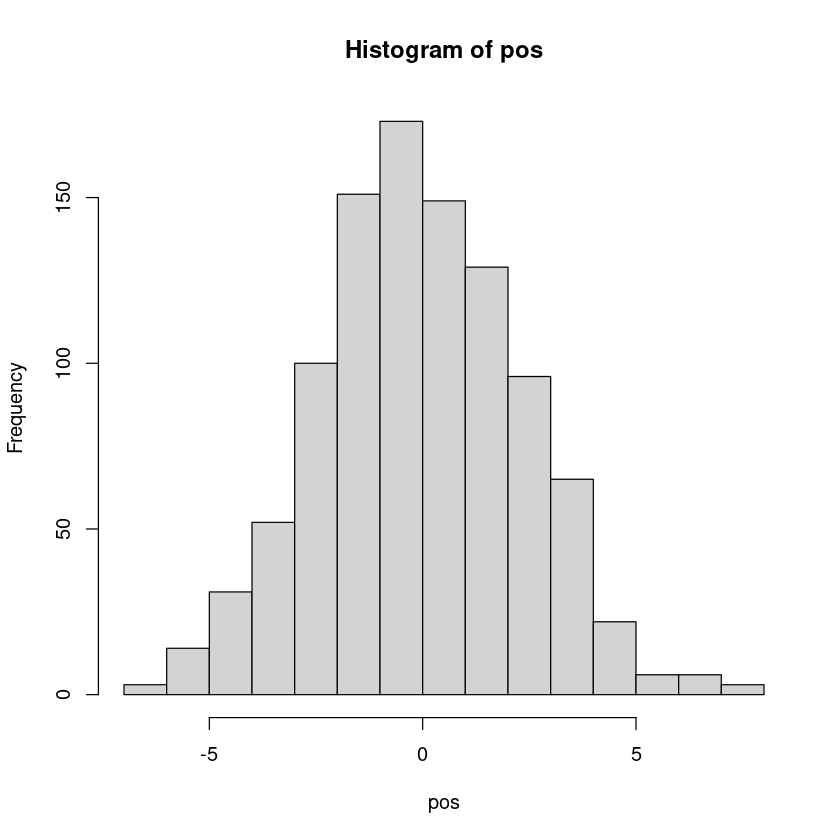

In [4]:
pos <- replicate(1000, sum(runif(16, -1, 1)))
hist(pos)

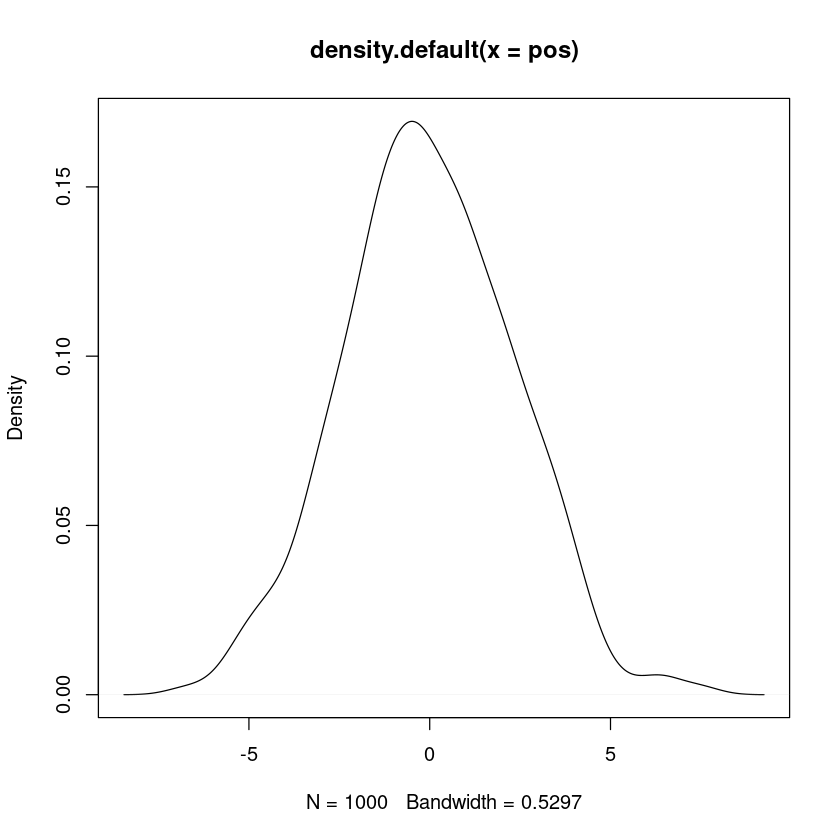

In [5]:
plot(density(pos))

+ Any process that adds together random variables from the same diustribution converges to a normal

+ 4.1.2 an allele? - What is it? - Cannot follow this section or 4.1.3, 4.14
+ ontological? epistemological?
+ Gaussian distribution is the most natural expression of our state of ignorance - least informative assumption to make.
+ Gaussian distribution can tend to have thin tails compared to some processes which have fat tails. Risk in using gaussian in these situations. Fat tails means higher probability of producing extreme events.

## 4.2 A language for describing models
### 3 step Recipe
1. Define variables - Observable variables are `data`, other unobservable vraiables like rates and averages are called `parameters`
2. Define each varaiable i.t.o the other variables or i.t.to. a probability distribution
3. The combo of variables and their probability distributions defines a `joint generative model`. This model can be used to simulate hypothetical observations and analyze real observations.

+ The model will look something like:

![alt text](images/4/model-sample.png "Title")

+ Globe tossing model is defined as:

    + W ~ Binomial(N, p)
    + p ~ Uniform(0, 1)
    
+ The first line defines the likelihood function, the other lines define priors.
+ `Stochastic` relationship is shown by ~

## 4.3 Gaussian Model of height
+ Linear regression model - The y variable is modeled as a gaussian distribution. Two parameters describe the ditribution - the mean $\mu$, and the standard deviation $\sigma$ 
+ Bayesian updating will consider every possible combination of values for $\mu$ and $\sigma$
+ Each combination will be scored by it's relative plausibility - with regards to the data.
+ These relative plausibilities are the posterior probabilities of each combination of values $\mu$ and $\sigma$

In [6]:
data(Howell1)
d <- Howell1
str(d)

'data.frame':	544 obs. of  4 variables:
 $ height: num  152 140 137 157 145 ...
 $ weight: num  47.8 36.5 31.9 53 41.3 ...
 $ age   : num  63 63 65 41 51 35 32 27 19 54 ...
 $ male  : int  1 0 0 1 0 1 0 1 0 1 ...


In [7]:
precis(d)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
height,138.2635963,27.6024476,81.108550,165.73500,▁▁▁▁▁▁▁▂▁▇▇▅▁
weight,35.6106176,14.7191782,9.360721,54.50289,▁▂▃▂▂▂▂▅▇▇▃▂▁
age,29.3443934,20.7468882,1.000000,66.13500,▇▅▅▃▅▂▂▁▁
male,0.4724265,0.4996986,0.000000,1.00000,▇▁▁▁▁▁▁▁▁▇


+ 544 people in the data, 47% male
+ height in cm, weight in kg

In [8]:
# Filter out anyone lt 18 years old - REMEMBER the COMMA !!!!! after the condition !!!!!!!
# comma means select on row condition, but return all columns
d2 <- d[d$age >= 18, ]

In [9]:
str(d2)

'data.frame':	352 obs. of  4 variables:
 $ height: num  152 140 137 157 145 ...
 $ weight: num  47.8 36.5 31.9 53 41.3 ...
 $ age   : num  63 63 65 41 51 35 32 27 19 54 ...
 $ male  : int  1 0 0 1 0 1 0 1 0 1 ...


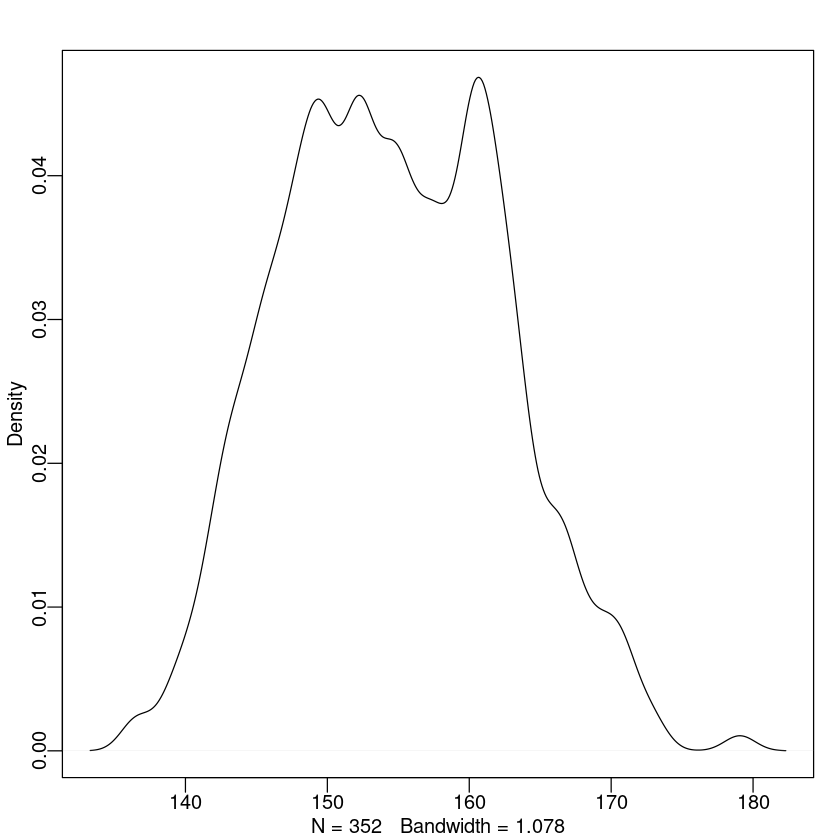

In [10]:
dens(d2$height)

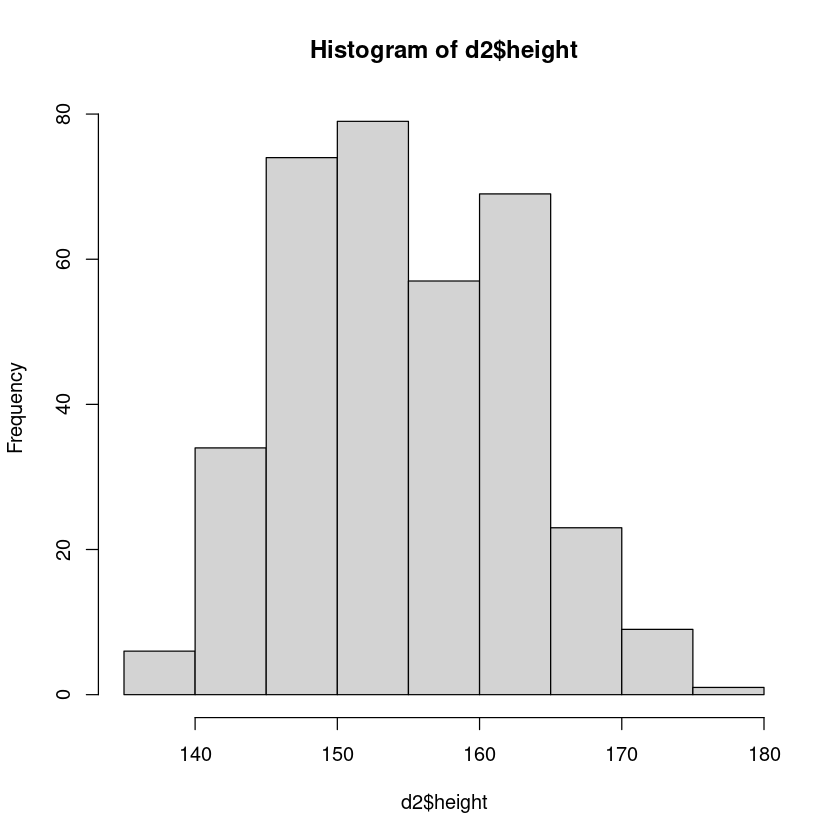

In [11]:
hist(d2$height)

+ 4.3.2 The Model
+ $h_i \sim Normal(\mu, \sigma)$
+ $_i$ refers to the row numbers - So the model knows that each height measurement is defined by the same normal distribution with mean $\mu$ and standard deviation $\sigma$
+ The model assumes each h is independent and identically distributed `iid` or `IID` `iid` indicates each value h has the same probability function independent of other h values. This is untrue - think of a tall family within the data - thay are not iid
+ epistemological - From Google - What is epistemology in simple terms? Epistemology is the theory of knowledge. It is concerned with the mind's relation to reality. What is it for this relation to be one of knowledge? Do we know things? And if we do, how and when do we know things? - This is so abstract ?? Do not understand the definition or why it matters. Cannot follow any of this ??????????????
`Exchangeable` - Don't get this
+ Adding the priors underneath the likelihood
    + $h_i \sim Normal(\mu, \sigma)$ [likelihood]
    + $mu \sim Normal(178, 20)$  [$\mu$ prior] - Gaussian prior centered on 178 cm with 95% probability of 178 +/- 40 cm (because 4 sigmas wide captures 95% of distribution)
    + $\sigma \sim Uniform(0, 50)$ [$\sigma$ prior] - A flat prior (uniform) that constrains $\sigma$ to be between 0 and 50. Bounding at 0 makes sense because a standard deviation cannot be negative. These numbers imply that 95% of the individual heights lie within 100 cm of the average height (2 sigmas wide ?)


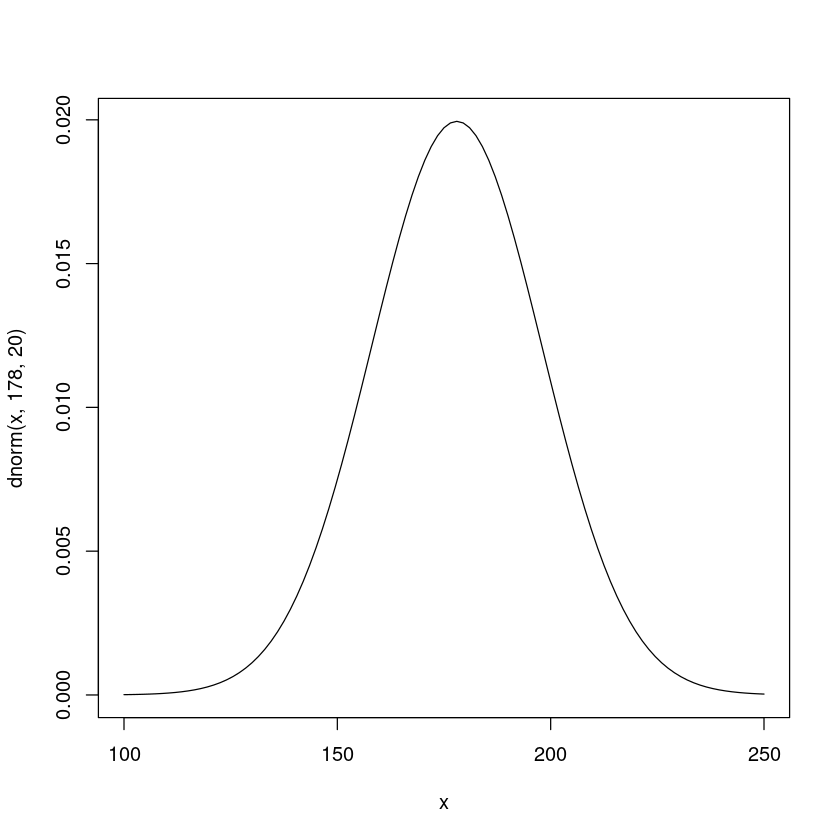

In [12]:
# mu prior
curve(dnorm(x, 178, 20), from=100, to=250)

+ This prior means that the average height (not individual heights) is most likely between 140 cm and 220 cm. This prior carries a little information, not a lot ? - How can that be - Surely, it carries a load of information

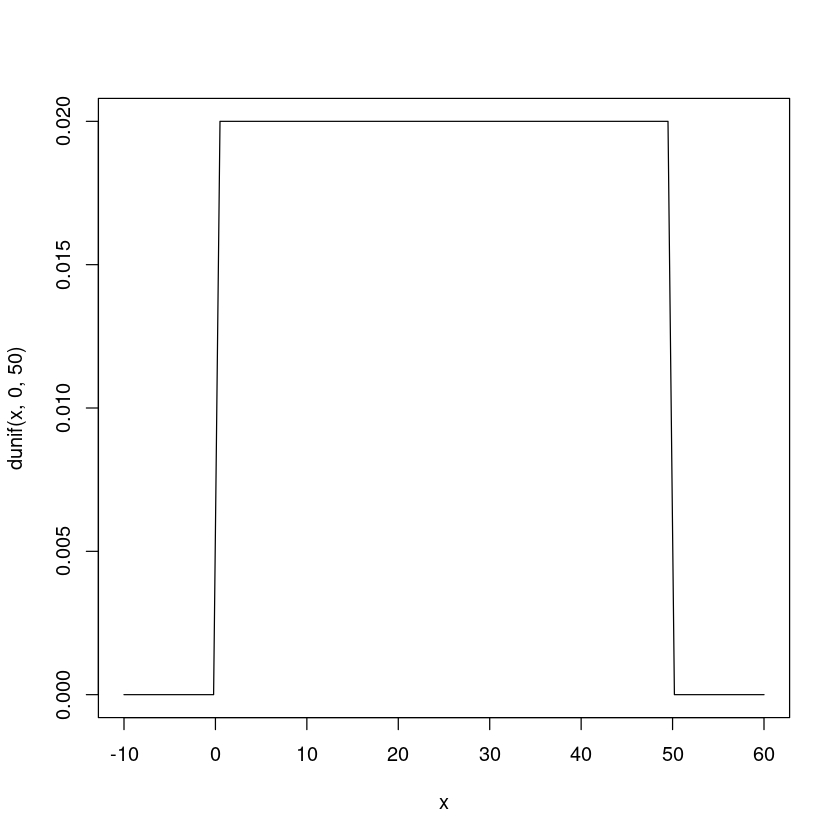

In [13]:
# sigma prior
curve( dunif( x , 0 , 50 ) , from=-10 , to=60 )

+ ### PRIOR PREDICTIVE SIMULATION
+ The expected distribution of heights averaged over the prior ? Don't get this?
+ The distribution of relative plausibilities of different heights, before seeing the data.

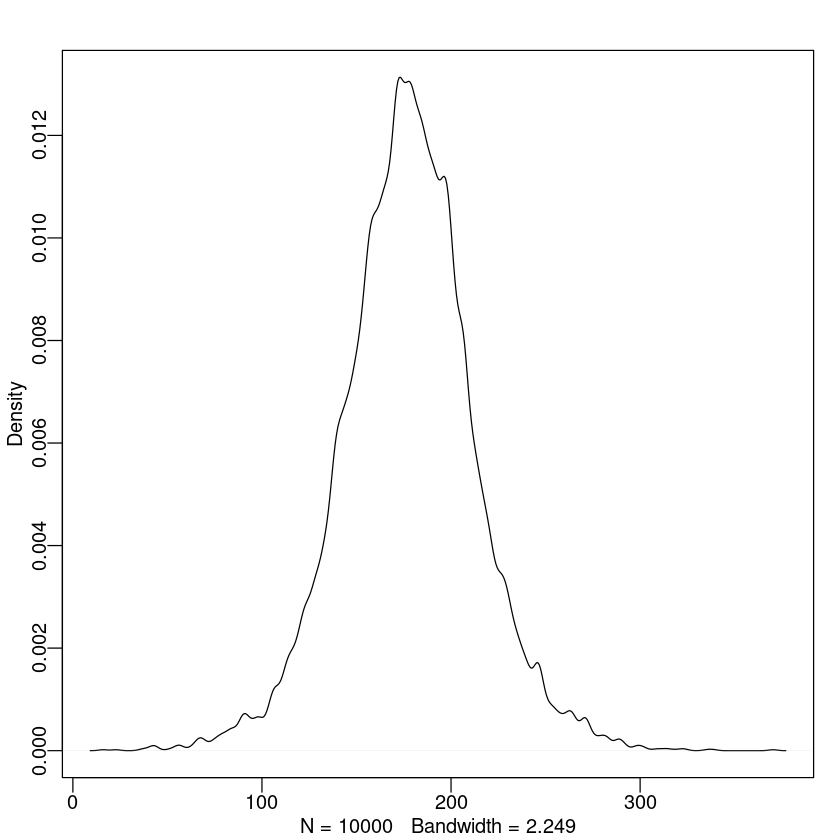

In [14]:
sample_mu <-rnorm(10000, 178, 20)
sample_sigma <- runif(10000, 0, 50)
prior_h <- rnorm(10000, sample_mu, sample_sigma)
dens(prior_h)

+ A worse prior for $\mu$ - much larger standard deviation
+ This does not make sense because the spread is too large - it goes into negative heights, and creates some giants
+ We could assume that the data will 'override' the impact of the priors, but if data is sparse, it may not. Therefore, it is good practice to select priors and do prior predictive simulation to check the results look sensible.
+ `The important thing is that your prior NOT be based on the values in the data, but only on what you know about the data before you see it` - I cannot see this as practical for most situations - I know nothing about the data before I see it - Autoclave vacuum, furnace cullet percentages, furnace temp - How can you know without looking at the data? 

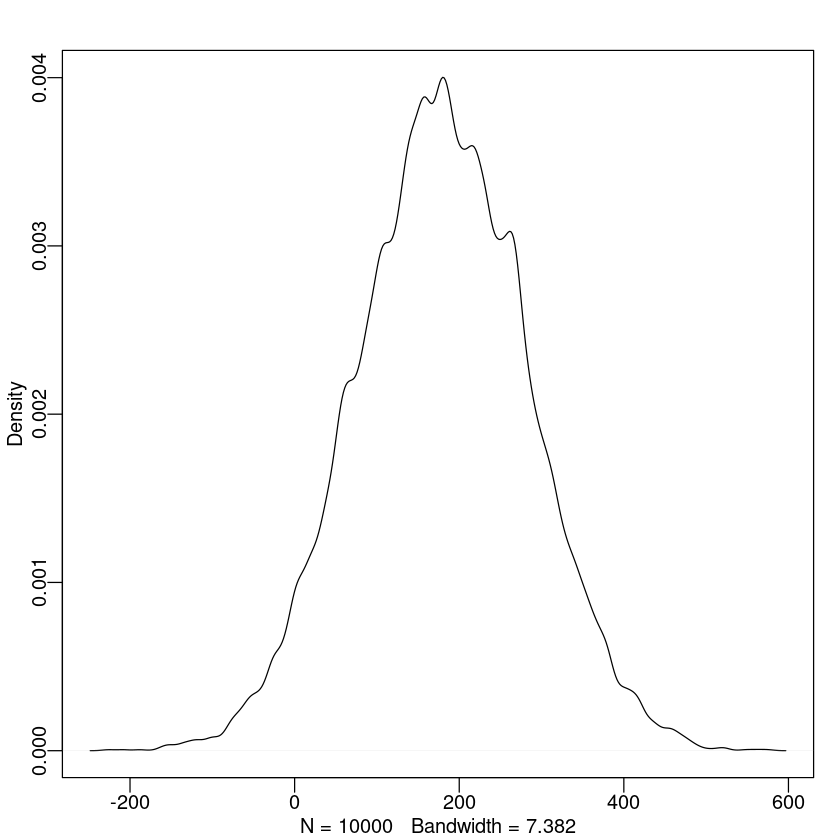

In [15]:
sample_mu <- rnorm(10000, 178, 100)
prior_h <- rnorm(10000, sample_mu, sample_sigma)
dens(prior_h)

### A Note on alternative notation - A farewell to epsilon
+ Gaussian linear model can be written as:
    + $h_i = \mu + \epsilon_i$
    + $\epsilon_i \sim Normal(0, sigma)$
+ This is poor form because it does not generalize to other types of models !? What about gauge R&R studies? - Do not understand this.

### 4.3.3 Grid Approximation of the posterior distribution

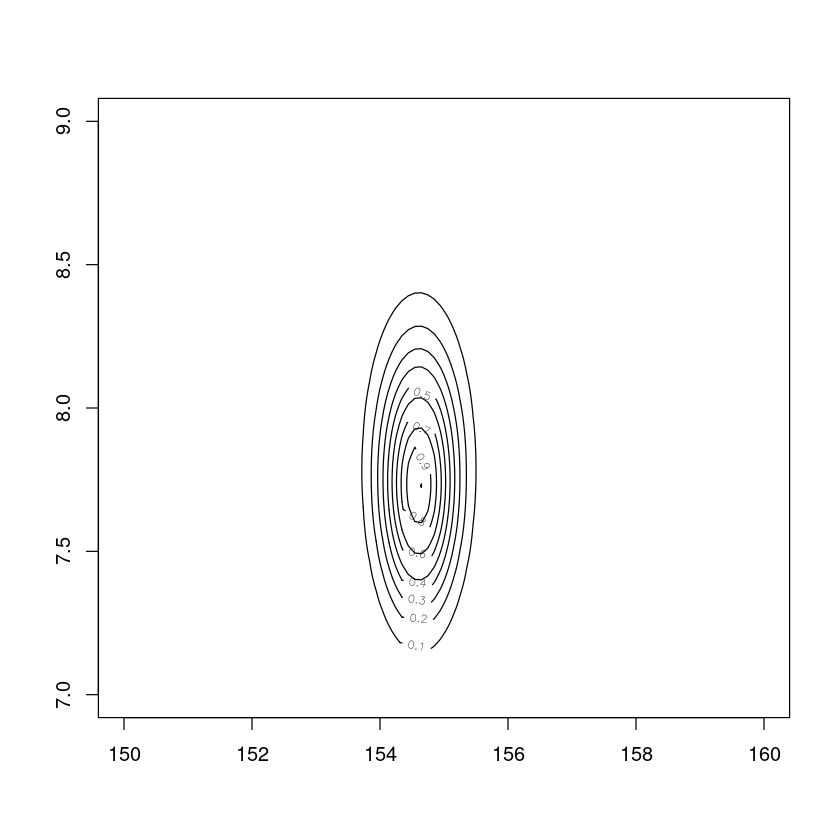

In [16]:
# Cannot follow this code - functions appear from nowhere - not sure what packages they are from
# https://www.youtube.com/watch?v=rY42MjlLzZc - Video explainer for code - could not keep up.
mu.list <- seq( from=150, to=160 , length.out=100 )
sigma.list <- seq( from=7 , to=9 , length.out=100 )
post <- expand.grid( mu=mu.list , sigma=sigma.list )
post$LL <- sapply( 1:nrow(post) , function(i) sum(dnorm( d2$height , post$mu[i] , post$sigma[i] , log=TRUE ) ) )
post$prod <- post$LL + dnorm( post$mu , 178 , 20 , TRUE ) + dunif( post$sigma , 0 , 50 , TRUE )
post$prob <- exp( post$prod - max(post$prod) )
contour_xyz( post$mu , post$sigma , post$prob )

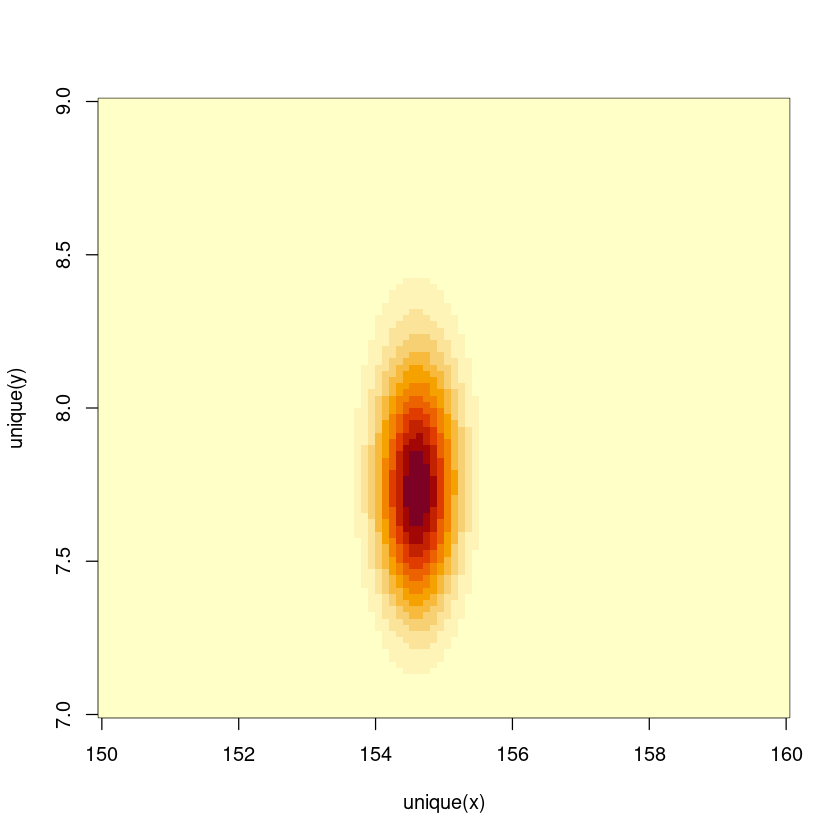

In [17]:
image_xyz( post$mu , post$sigma , post$prob )

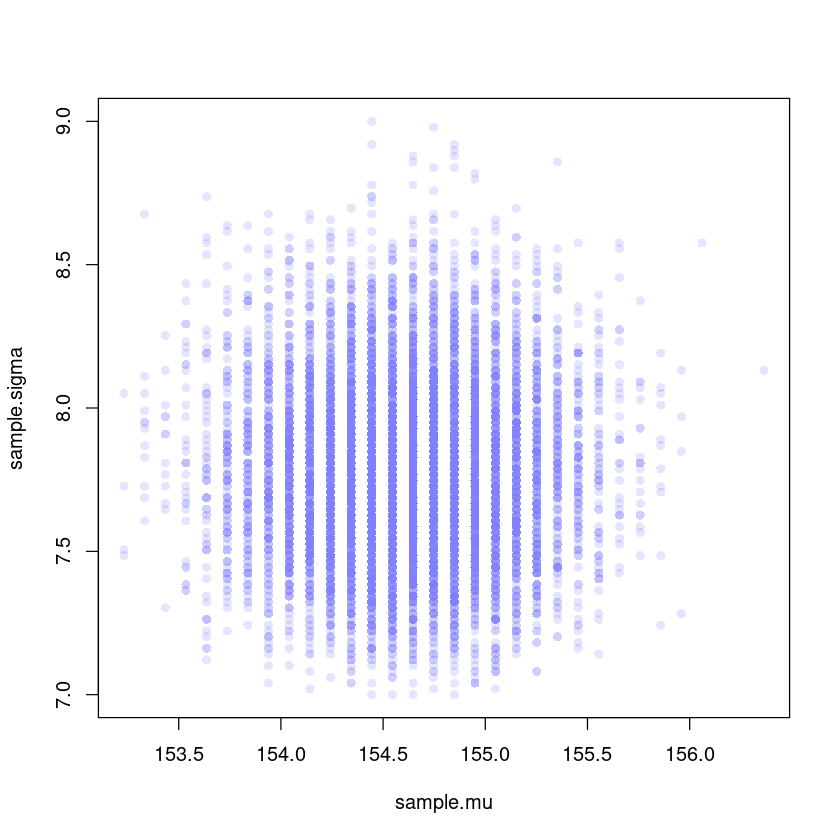

In [18]:
sample.rows <- sample( 1:nrow(post) , size=1e4 , replace=TRUE , prob=post$prob )
sample.mu <- post$mu[ sample.rows ]
sample.sigma <- post$sigma[ sample.rows ]
plot( sample.mu , sample.sigma , cex=1.0 , pch=16 , col=col.alpha(rangi2,0.2) )

+ Takeaway from this plot is that  darker blue is more plausibility
+ The most plasible values of sigma and mu are the ecenter of the circular plot

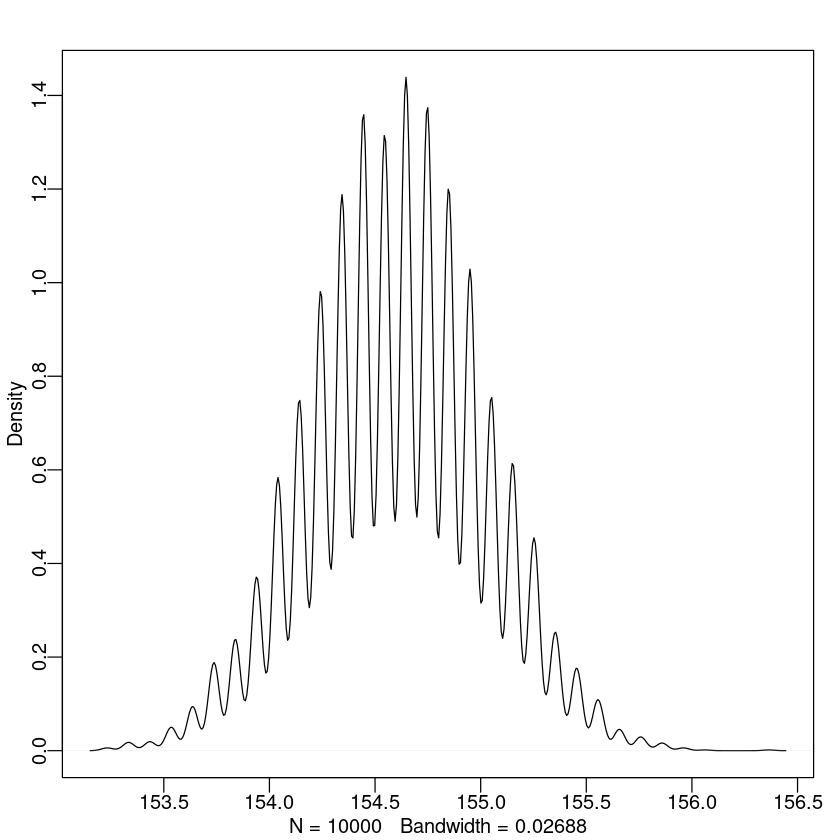

In [19]:
dens( sample.mu )

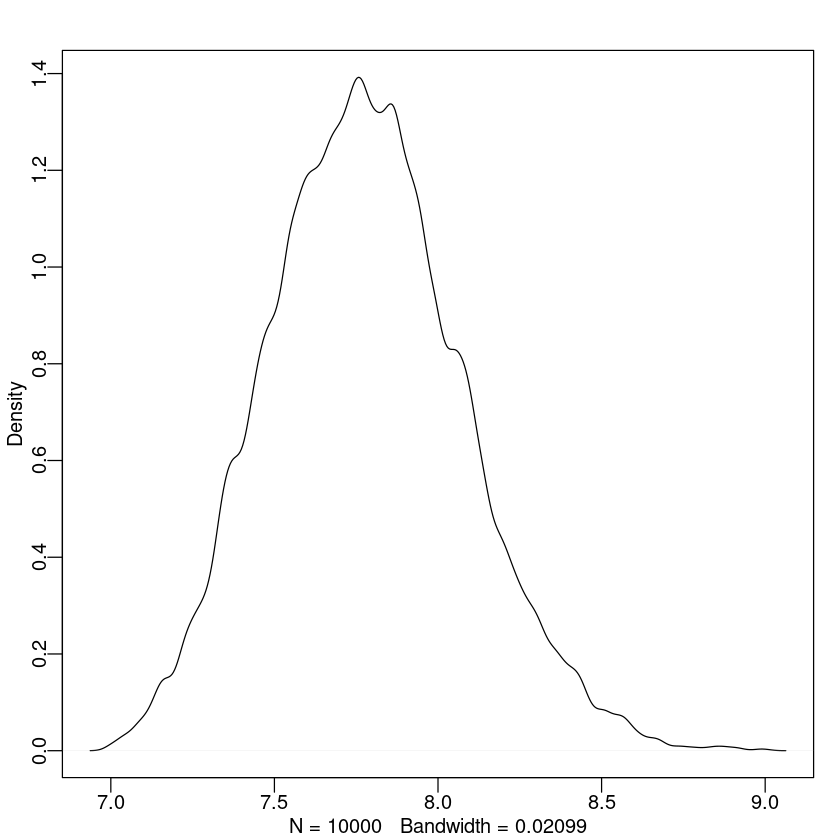

In [20]:
dens( sample.sigma )

In [21]:
print('Mean:')
print(PI( sample.mu ))
print(' ')
print('Standard Deviation:')
print(PI( sample.sigma ))

[1] "Mean:"
      5%      94% 
153.9394 155.2525 
[1] " "
[1] "Standard Deviation:"
      5%      94% 
7.323232 8.272727 


### Overthinking: sample size and normality of sigma's posterior ??? This section is incomprehensible ???

### 4.3.5 Finding the posterior with `quap`

In [22]:
# data (as before)
data(Howell1)
d <- Howell1
d2 <- d[d$age >= 18, ]

+ Model:
    + $h_i \sim Normal(\mu, \sigma)$
    + $\mu \sim Normal(178, 20)$
    + $\sigma \sim Uniform(0, 50)$

In [23]:
# Define the model in code
flist <- alist(
    height ~ dnorm(mu, sigma),
    mu ~ dnorm(178, 20),
    sigma ~ dunif(0, 50)
)
# fit the model to the dataframe `d2`
m4.1 <- quap(flist, data=d2)
# Review the fitted model
precis(m4.1)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
mu,154.607034,0.4120109,153.9486,155.265507
sigma,7.731638,0.2914147,7.2659,8.197375


+ Plausibility of each value of $\mu$, after averaging over the plausibilities of each value of $\sigma$ is given by 154.6 and standard deviation 0.4
+ 5.5% and 94.5% - percentile interval boundaries - Note v. close to answers using grid approximation.
+ Change std dev to 0.1 to give a very narrow prior

In [24]:
m4.2 <- quap(
    alist(
        height ~ dnorm(mu, sigma),
        mu ~ dnorm(178, 0.1),
        sigma ~ dunif(0, 50)
    ), data=d2)
precis(m4.2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
mu,177.86375,0.1002354,177.70356,178.02395
sigma,24.51756,0.9289234,23.03296,26.00216


+ $\mu$ is basically the same as the prior
+ But $\sigma$ is much bigger
+ Not sure what to make of this?
+ ### 4.3.6 Sampling from a quap
+ ?? Cannot follow this ???

In [25]:
vcov(m4.1)

,mu,sigma
mu,0.1697529755,0.0002183055
sigma,0.0002183055,0.0849225413


+ `VARIANCE-COVARIANCE` matrix
+ Shows how every parameter relates to everey other parameter

In [26]:
# The list of variances
diag(vcov(m4.1))

mu      sigma 
0.16975298 0.08492254

In [27]:
# The correlation matrix
cov2cor(vcov(m4.1))

,mu,sigma
mu,1.000000000,0.001818212
sigma,0.001818212,1.000000000


+ Not understanding the point of all this stuff about variance, covariance? Why is it relevant?
+ Get samples from the multi-dimensional posterior

In [28]:
post <- extract.samples(m4.1, n=10000)
head(post)

,mu,sigma
,<dbl>,<dbl>
1,155.1148,8.082409
2,154.6743,7.455232
3,155.4076,7.652227
4,154.5425,7.913345
5,154.3835,7.810852
6,155.6081,7.484159


In [29]:
precis(post)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
mu,154.611746,0.4146701,153.94409,155.275043,▁▁▅▇▂▁▁
sigma,7.728074,0.2918793,7.25921,8.193167,▁▁▁▂▅▇▇▃▁▁▁▁▁


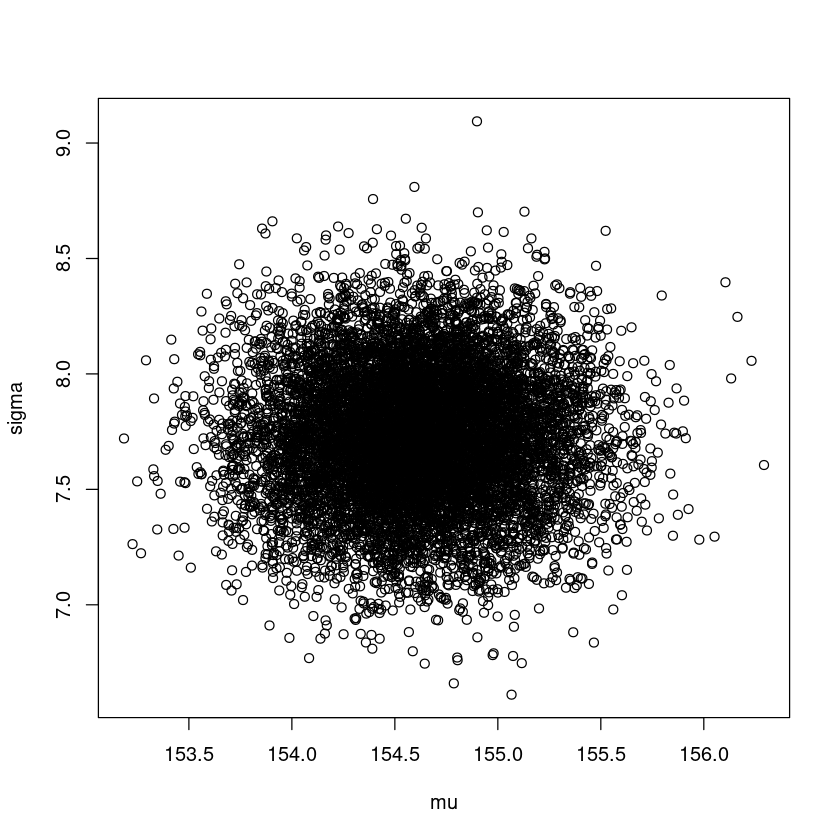

In [30]:
plot(post)

+ This seems a bit unsatisfactory. - Why not get back to height and compare that instead of this 2d plot - Not sure what to do with the results

## 4.4 Linear prediction
+ `PREDICTOR VARIABLE` - this is the x to my y
+ Set height as y - outcome variable
+ Set weight as x - predictor variable
+ So, we are a blind man with a digital scale that speaks the weight of a person. We collect the numbers and try and predict height from weight. What a funny way of setting up the problem. Why not predict weight from height like every other textbook? 

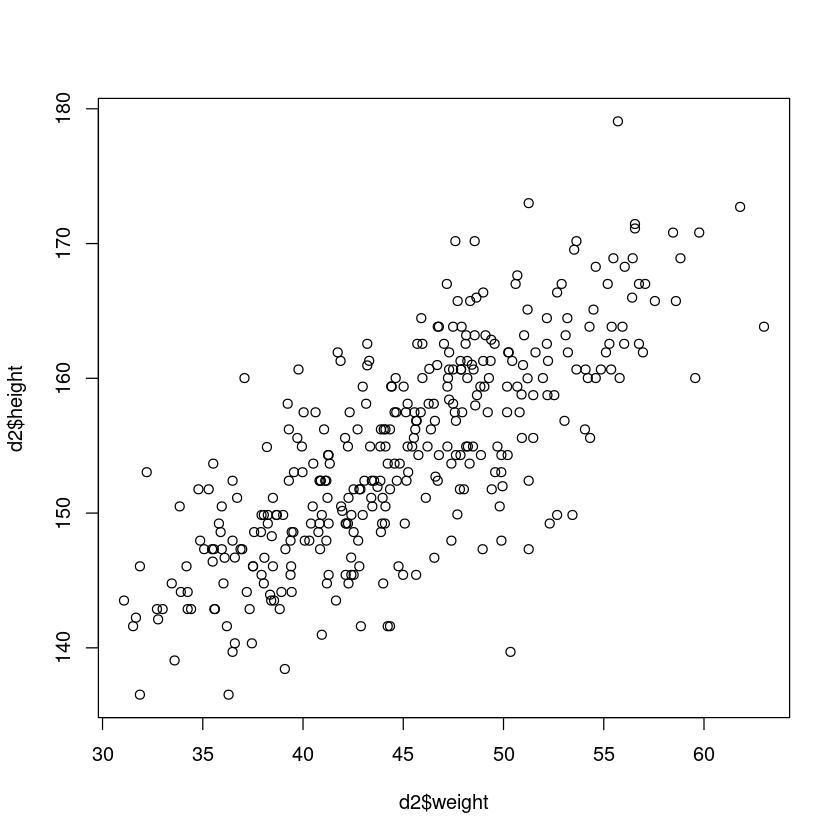

In [31]:
data(Howell1); d <- Howell1; d2 <- d[ d$age >= 18 , ]
plot( d2$height ~ d2$weight )

### What is regression? - TODO - seems important
+ ### 4.4.1 The linear model strategy
+ The model
    + $h_i \sim Normal(\mu, \sigma)$ [likelihood]
    + $u_i = \alpha + \beta(x_i - \bar{x})$ [linear model]
    + $\alpha \sim Normal(178, 20)$ [alpha prior]
    + $\beta \sim Normal(0, 10)$ [beta prior]
    + $\sigma \sim Uniform(0, 50)$ [sigma prior]

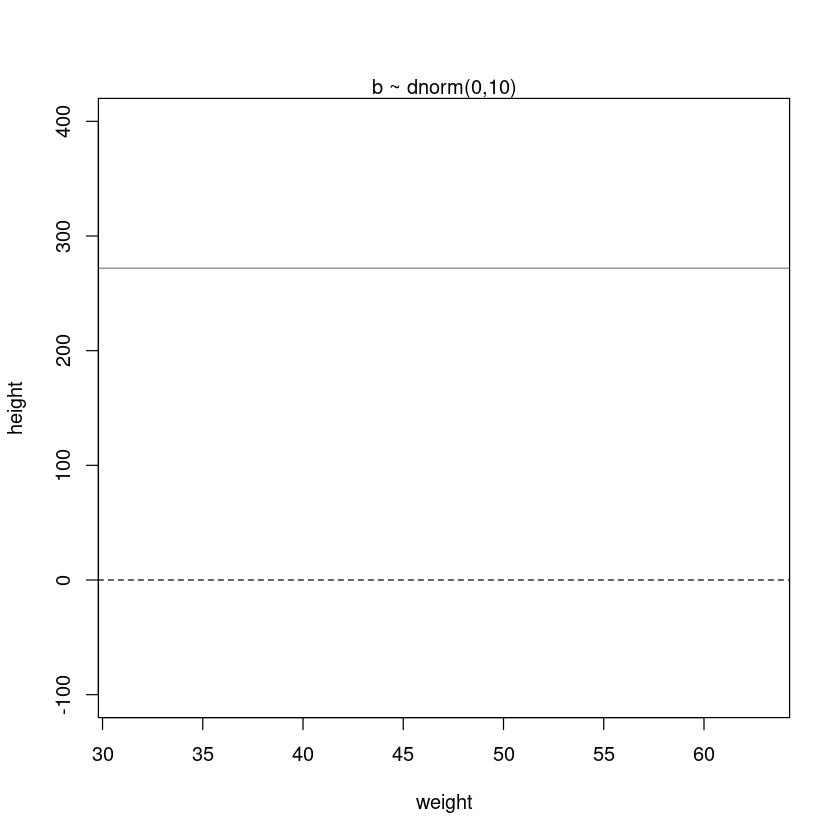

In [32]:
# Prior Predictive modeling R code 4.38 & 9
set.seed(2971)
N <- 100
a <- rnorm(N, 178, 20)
b <- rnorm(N, 0, 10)
# Finding this code really difficult - Cannot get it to run - Seems pretty complex just to plot a few lines
# If i cannot see it, I've got no chance of understanding it
plot(NULL, xlim=range(d2$weight), ylim=c(-100, 400), xlab='weight', ylab='height')
abline(h=0, lty=2)
abline( h=272 , lty=1 , lwd=0.5 )
mtext( "b ~ dnorm(0,10)" )
xbar <- mean(d2$weight)
# Problem code here:
# for ( i in 1:N )
#  curve( a[i] + b[i]*(x - xbar)
#   from=min(d2$weight) , to=max(d2$weight) , add=TRUE , col=col.alpha(“black”,0.2) )

+ the plot should look like the left hand:

![alt text](images/4/bad-code-plot.png "Title")

+ These priors are off
+ The left hand plot says that the relationship between weight and height could be positive, or negative. Of course, this is not correct
+ If we change beta to always be positive, this is more in line with reality
+ We do this by setting the beta prior to a lognormal distribution
+ $\beta \sim LogNormal(0, 1)$

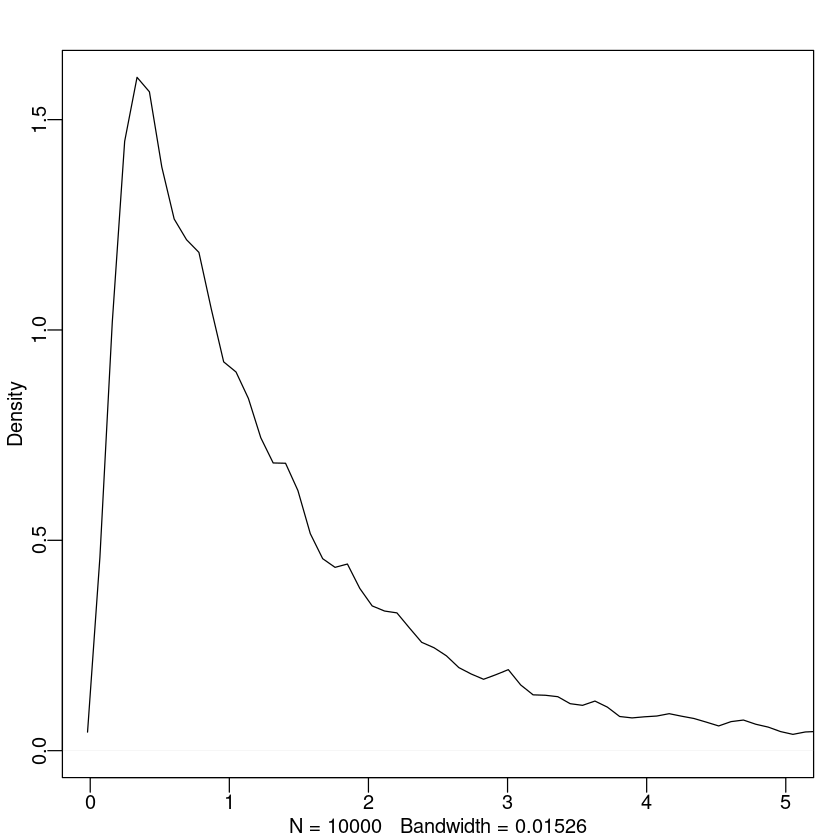

In [33]:
b <- rlnorm(10000, 0, 1)
dens(b, xlim=c(0,5), adj=0.1)

+ If we simulate the prior predictive using the new beta we get the plots on the r.h side, which is much more plausible
+ ### 4.42 Finding the posterior distribution
+ The model
    + $h_i \sim Normal(\mu, \sigma)$ [height ~ dnorm(mu, sigma)]
    + $u_i = \alpha + \beta(x_i - \bar{x})$ [mu <- a + b*(weight - mean weight)]
    + $\alpha \sim Normal(178, 20)$ [a ~ dnorm(178, 20)]
    + $\beta \sim Log-Normal(0, 1)$ [b ~ dlnorm(0,1)]
    + $\sigma \sim Uniform(0, 50)$ [sigma ~ dunif(0, 50)]
+ Build the model

In [34]:
data(Howell1); d <- Howell1; d2 <- d[ d$age >= 18 , ]
# Mean weight
xbar <- mean(d2$weight)
# fit model
m4.3 <- quap(
    alist(
        height ~ dnorm(mu, sigma),
        mu <- a + b*(weight - xbar),
        a ~ dnorm(178, 20),
        b ~ dlnorm(0,1),
        sigma ~ dunif(0, 50)
    ), data=d2)

+ Now that we have coded this up in the way he showed us, we now have to code it up in another way by moving the log !!! - Why not do it this way to start

In [35]:
m4.3b <- quap(
    alist(
        height ~ dnorm(mu, sigma),
        mu <- a + exp(log_b)*(weight - xbar),
        a ~ dnorm(178, 20),
        log_b ~ dnorm(0,1),
        sigma ~ dunif(0, 50)
    ), data=d2)

In [36]:
precis(m4.3)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,154.6013684,0.27030758,154.1693646,155.0333721
b,0.9032809,0.04192362,0.8362789,0.9702829
sigma,5.0718794,0.19115465,4.7663774,5.3773815


In [37]:
round( vcov( m4.3 ) , 3 ) # - What do I get from this?

,a,b,sigma
a,0.073,0.000,0.000
b,0.000,0.002,0.000
sigma,0.000,0.000,0.037


Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”


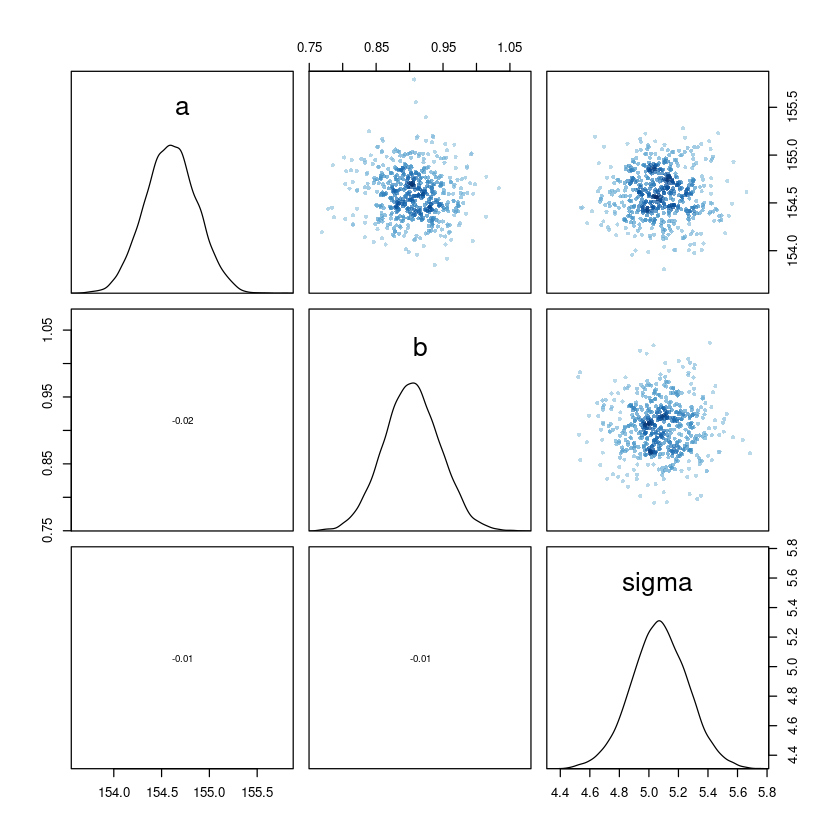

In [38]:
pairs(m4.3)

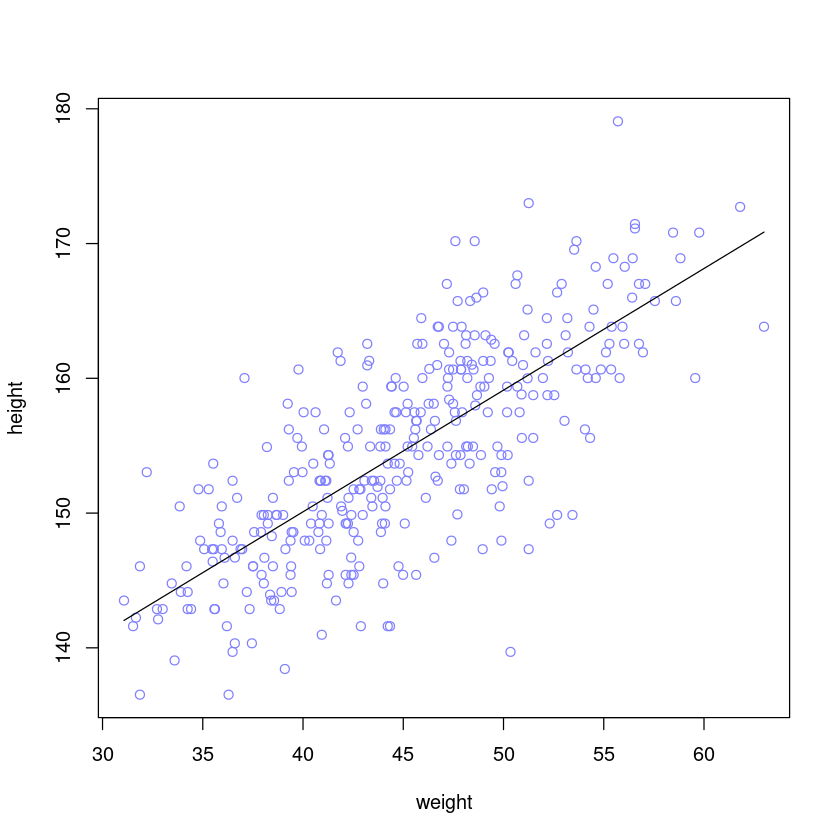

In [39]:
# Superimpose posterior mean over the data
plot( height ~ weight , data=d2 , col=rangi2 )
post <- extract.samples( m4.3 )
a_map <- mean(post$a)
b_map <- mean(post$b)
curve( a_map + b_map*(x - xbar) , add=TRUE )

In [40]:
post <- extract.samples( m4.3 )
post[1:5,]

,a,b,sigma
,<dbl>,<dbl>,<dbl>
1,154.4416,0.9355837,5.269199
2,154.3916,0.9001864,5.168703
3,154.9015,0.8591870,4.610638
4,154.6510,0.8708604,5.401187
5,155.2329,0.9031896,4.985321


In [41]:
# R code 4.48
N <- 10
dN <- d2[ 1:N , ]
mN <- quap(
    alist(
        height ~ dnorm( mu , sigma ),
        mu <- a + b*( weight - mean(weight)),
        a ~ dnorm( 178 , 20 ),
        b ~ dlnorm( 0 , 1 ),
        sigma ~ dunif( 0 , 50 )
        ), data=dN )

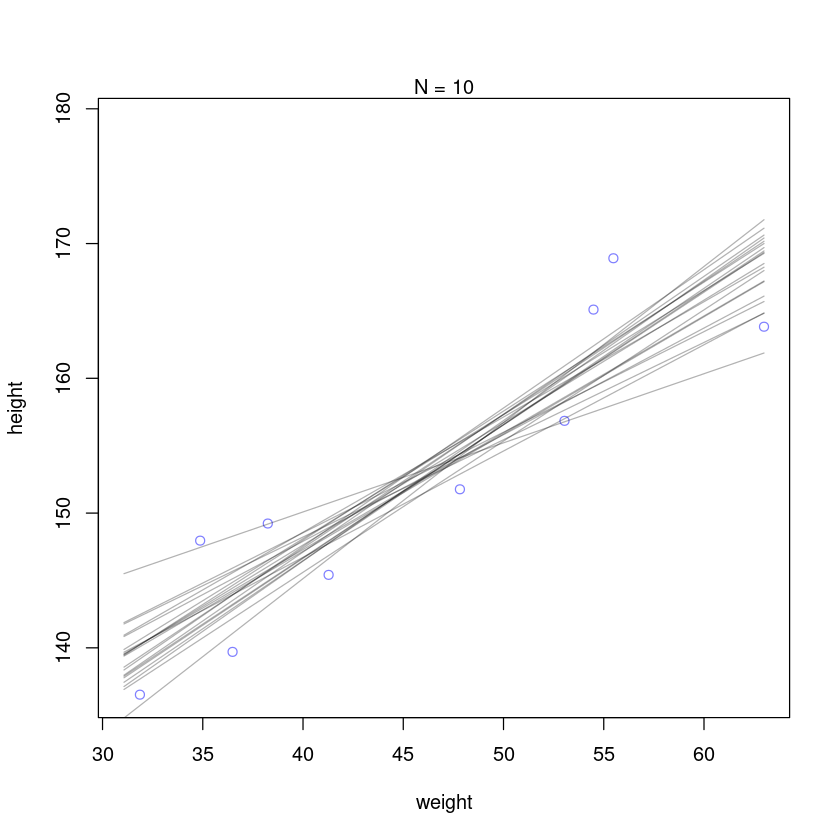

In [42]:
post <- extract.samples( mN , n=20 )
# display raw data and sample size
plot( dN$weight, dN$height, xlim=range(d2$weight), ylim=range(d2$height), col=rangi2, xlab="weight", ylab="height")
mtext(concat("N = ",N))
# plot the lines, with transparency
for ( i in 1:20 )
 curve( post$a[i] + post$b[i]*(x-mean(dN$weight)) ,
  col=col.alpha("black",0.3) , add=TRUE )

+ N is the number of samples extracted from the posterior
+ each plot has 2 lines
+ the lines get closer together because the uncertainty associated with the size of N decreases as N increases

![alt text](images/4/regression-lines.png "Title")

+ ### 4.4.3.4. Plotting regression intervals and contours
+ This section describes a super complicated way of defining and plotting uncertainty - Very complex and confusing, but seems very important
+ Rather than seeing multiple lines, better to plot an arbitrarily set interval around the average regression line.

In [43]:
# Focus on single weight 50 kg. Can make list of values for mu for individual weighing 50 kg
post <-extract.samples(m4.3)
mu_at_50 <- post$a + post$b*(50 - xbar)
mu_at_50[0:5]

[1] 159.4442 159.0121 158.6288 159.4307 158.7126

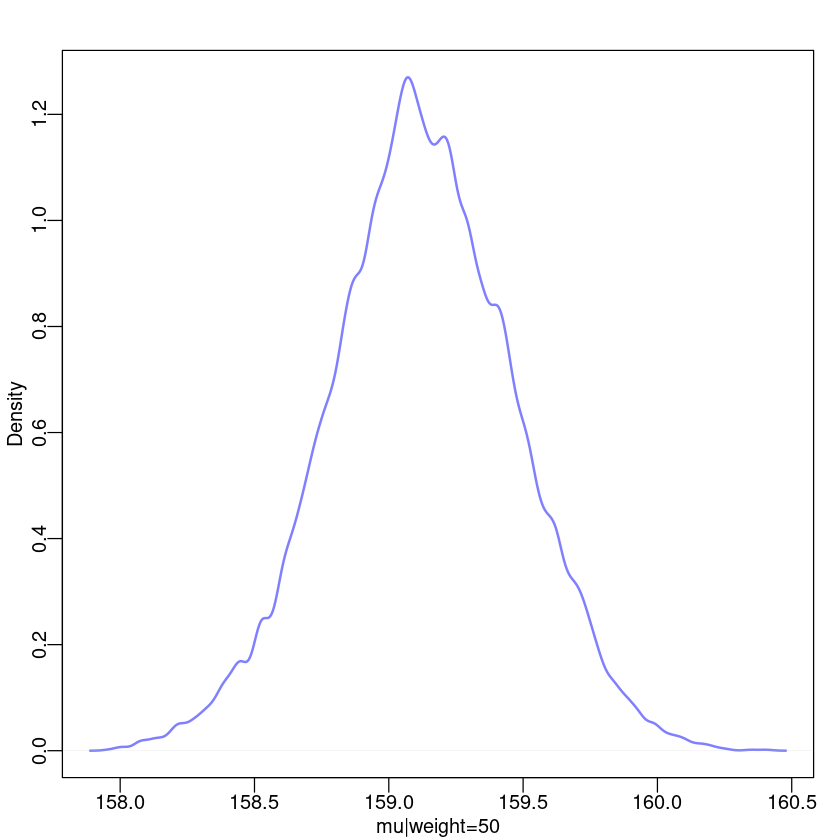

In [44]:
# The posterior distribution of the mean height mu when weight = 50 kg
dens(mu_at_50, col=rangi2, lwd=2, xlab="mu|weight=50")

In [45]:
# We can find any interval using the PI function
PI(mu_at_50, prob=0.89)

5%      94% 
158.5783 159.6784

In [46]:
# Now we want to do this for every weight, so we can darw 89% interval around the complete mean regression line
# Use the link function
# This returns data (delault len=1000) of 352 columns (because 352 people in the data) by 1000 rows / samples  
# This is yet another diversion/digression/red herring - the proper way to do the task is in the next cell
mu <- link(m4.3)
str(mu)

 num [1:1000, 1:352] 157 157 157 157 157 ...


In [47]:
weight.seq <- seq(from=25, to=70, by=1)
mu <- link(m4.3, data=data.frame(weight=weight.seq))
str(mu)

 num [1:1000, 1:46] 137 136 137 137 137 ...


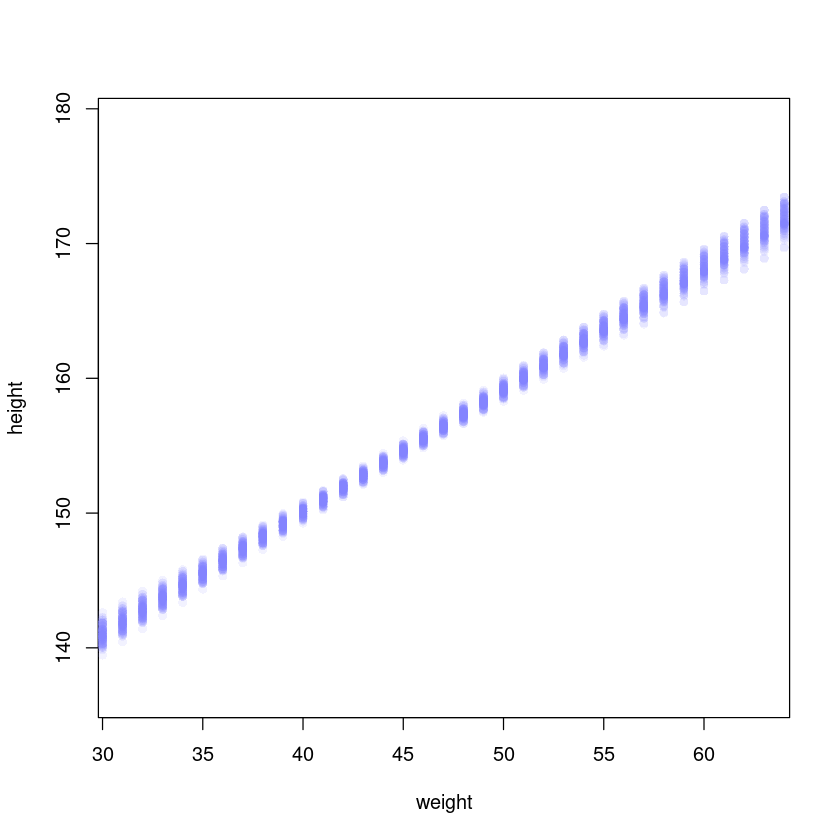

In [48]:
plot( height ~ weight , d2 , type="n")
for ( i in 1:100 )
 points( weight.seq , mu[i,] , pch=16 , col=col.alpha(rangi2,0.1) )

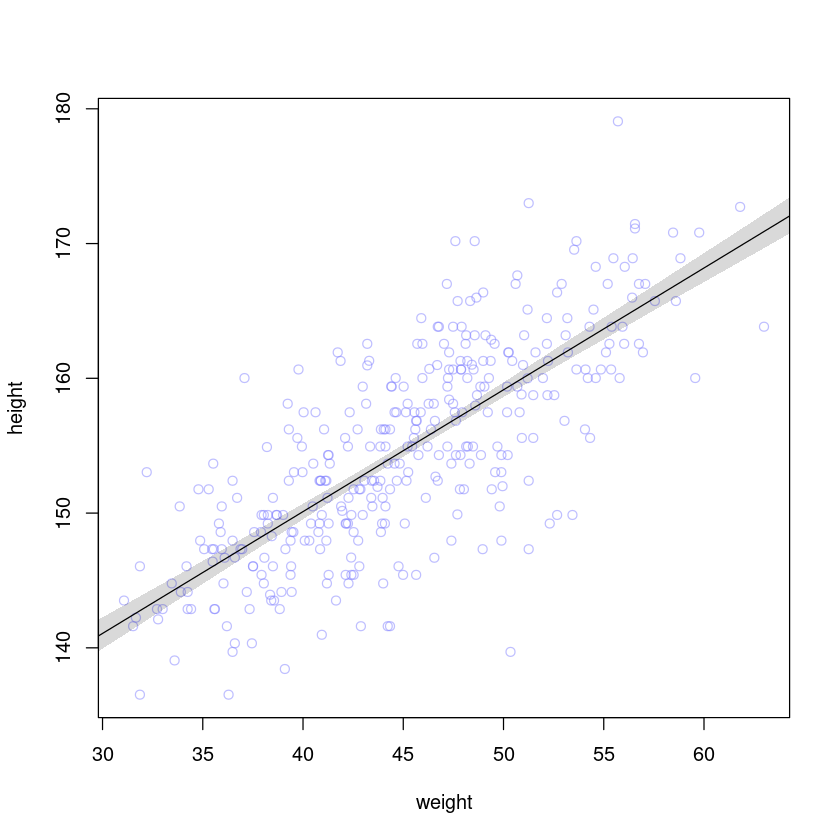

In [49]:
mu.mean <- apply(mu, 2, mean)
mu.PI <- apply(mu, 2, PI, prob=0.89)
# Plot data
plot( height ~ weight , data=d2 , col=col.alpha(rangi2,0.5) )
# Plot mean regression line
lines( weight.seq , mu.mean )
# Shade the PI
shade( mu.PI , weight.seq )

### Summary of Method for generating predictions and intervals from the posterior of a fitted model
1. Use `link` to generate distributions of posterior values for `mu` - pass in your own linspace vals
2. Use summary  function mean or PI to find mean, upper & lower bounds
3. Plot using `lines` and `shade`

### 4.4.3.5 Prediction Intervals
+ 89% prediction intervals for actual height, not just average height.

In [50]:
sim.height <- sim(m4.3, data=list(weight=weight.seq))
str(sim.height)

 num [1:1000, 1:46] 134 144 144 143 130 ...


integer(0)

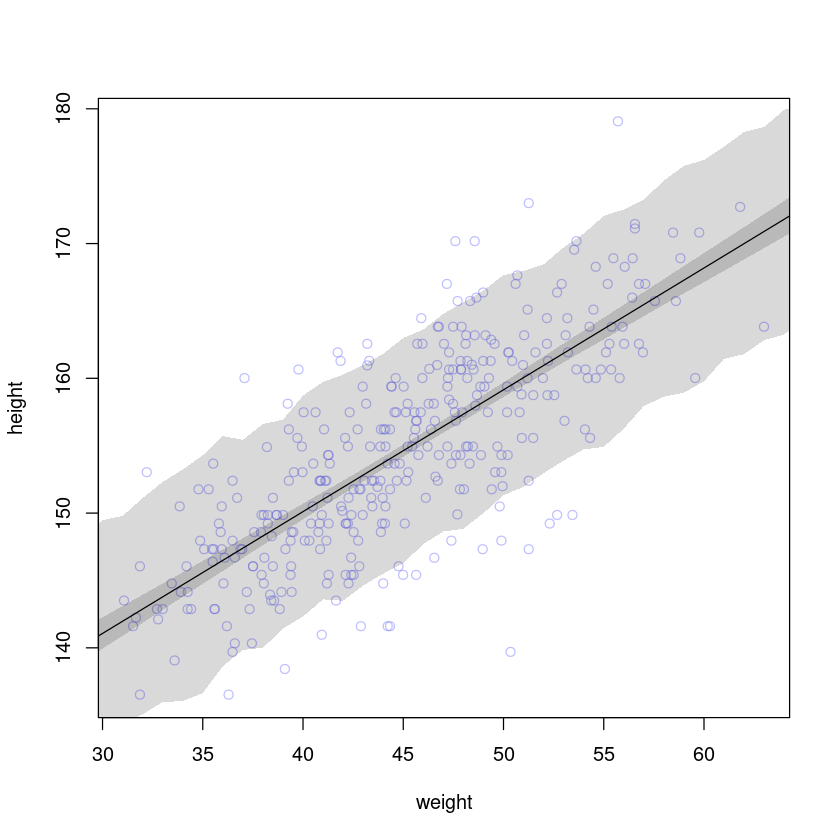

In [51]:
height.PI <- apply(sim.height, 2, PI, prob=0.89)
plot( height ~ weight , d2 , col=col.alpha(rangi2,0.5) )
lines( weight.seq , mu.mean )
shade( mu.PI , weight.seq ) - # Code error mu.HDPI in book
shade( height.PI , weight.seq )

# 4.5 Curves from Lines

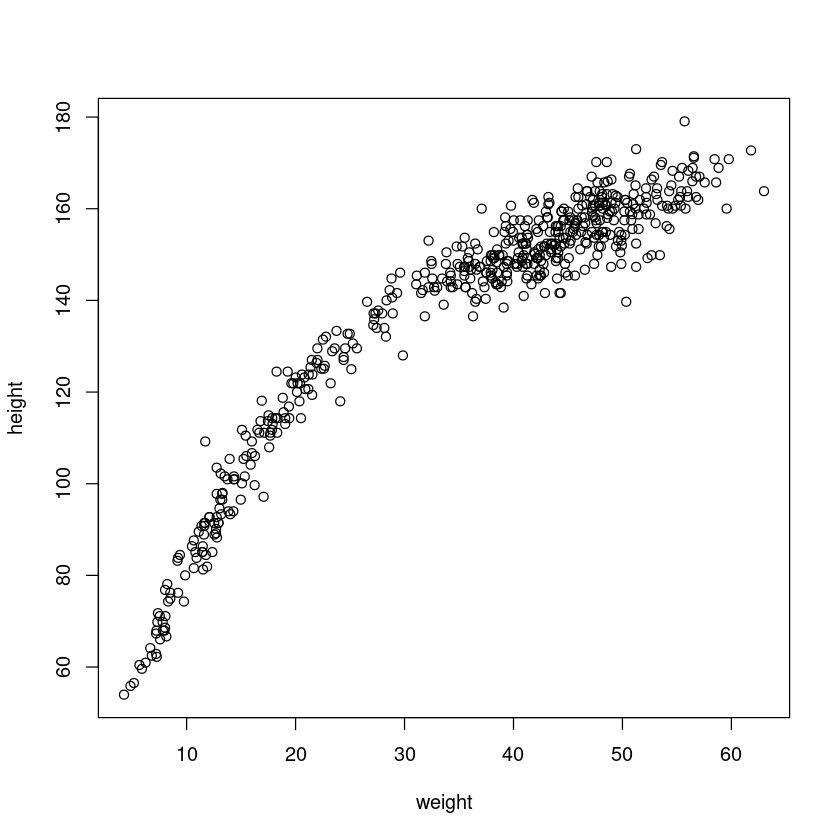

In [52]:
library(rethinking)
data(Howell1)
d <- Howell1
plot(height ~ weight, d)

+ Second order parabolic model of the mean
+ $\mu_i = \alpha + \beta_1x_1 + \beta_2x_i^2$
+ the parameter $\beta_2$ measures the curvature of the relationship
+ Model
    + $h_i \sim Normal(\mu_i, \sigma)$ [height ~ dnorm(mu, sigma)]
    + $u_i = \alpha + \beta_1x_1 + \beta_2x_i^2$ [mu <- a + b1*weight.s + b2*weight.s^2]
    + $\alpha \sim Normal(178, 20)$ [a ~ dnorm(178,20)]
    + $\beta_1 \sim Log-Normal(0,1)$ [b1 ~ dlnorm(0,1)]
    + $\beta_2 \sim Normal(0,1)$ [b2 ~ Normal(0,1)]
    + $\sigma \sim Uniform(0,50)$ [sigma ~ dunif(0,50)]

In [53]:
d$weight_s <- ( d$weight - mean(d$weight) )/sd(d$weight) # Standardize the target variable
d$weight_s2 <- d$weight_s^2
m4.5 <- quap(
 alist(
  height ~ dnorm( mu , sigma ) ,
  mu <- a + b1*weight_s + b2*weight_s2 ,
  a ~ dnorm( 178 , 20 ) ,
  b1 ~ dlnorm( 0 , 1) ,
  b2 ~ dnorm( 0 , 1 ) ,
  sigma ~ dunif( 0 , 50 )
 ) , data=d )

precis( m4.5 )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,146.057404,0.3689752,145.467710,146.647097
b1,21.733069,0.2888887,21.271369,22.194769
b2,-7.803268,0.2741836,-8.241467,-7.365070
sigma,5.774468,0.1764646,5.492443,6.056492


In [54]:
weight.seq <- seq( from=-2.2 , to=2 , length.out=30 )
pred_dat <- list( weight_s=weight.seq , weight_s2=weight.seq^2 )
mu <- link( m4.5 , data=pred_dat )
mu.mean <- apply( mu , 2 , mean )
mu.PI <- apply( mu , 2 , PI , prob=0.89 )
sim.height <- sim( m4.5 , data=pred_dat )
height.PI <- apply( sim.height , 2 , PI , prob=0.89 )

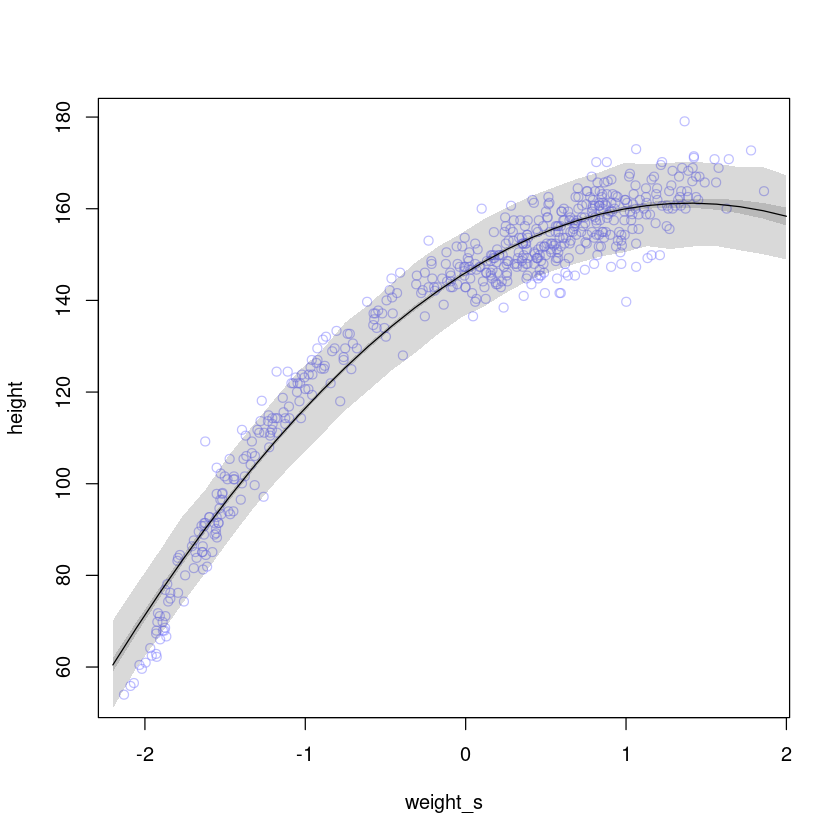

In [55]:
plot( height ~ weight_s , d , col=col.alpha(rangi2,0.5) )
lines( weight.seq , mu.mean )
shade( mu.PI , weight.seq )
shade( height.PI , weight.seq )

### 4.5.2 Splines
+ TODO

In [56]:
?runif

Uniform {stats},R Documentation
"x, q",vector of quantiles.
p,vector of probabilities.
n,"number of observations. If length(n) > 1, the length is taken to be the number required."
"min, max",lower and upper limits of the distribution. Must be finite.
"log, log.p","logical; if TRUE, probabilities p are given as log(p)."
lower.tail,"logical; if TRUE (default), probabilities are P[X \le x], otherwise, P[X > x]."
